# **Analyzing eBay perfume trends, including identification of high-selling products, changes in product demand, regions with significant purchase activity, revenue generation, and restocking requirements.**


# We will begin by preparing the data, ensuring we include all the necessary libraries and execute the essential operations

In [1]:
import pandas as pd
import numpy as np

In [3]:
perfumes = pd.read_csv('/content/ebay_womens_perfume (1).csv')
perfumes

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
0,Carolina Herrera,Good Girl by Carolina Herrera 2.7 oz Eau De Pa...,Eau de Parfum,43.99,US $43.99/ea,2.0,2 available / 393 sold,393.0,"May 23, 2024 10:43:50 PDT","Thomasville, Alabama, United States"
1,As Shown,Parfums de Marly Delina La Rosee Eau de Parfum...,Eau de Parfum,79.99,US $79.99,5.0,5 available / 40 sold,40.0,"May 24, 2024 00:15:48 PDT","New Jersey, Hong Kong"
2,PRADA,PRADA Paradoxe by Prada EDP 3.0oz/90ml Spray P...,Eau de Parfum,59.99,US $59.99,10.0,More than 10 available / 35 sold,35.0,"May 14, 2024 20:54:25 PDT","Orange, New Jersey, United States"
3,As Show,J'adore Parfum D'eau by Christian 3.4 oz EDP F...,Eau de Parfum,59.99,US $59.99/ea,10.0,More than 10 available / 9 sold,9.0,"May 23, 2024 01:23:05 PDT","USA, New Jersey, Hong Kong"
4,Khadlaj,Shiyaaka for Men EDP Spray 100ML (3.4 FL.OZ) B...,Eau de Parfum,29.99,US $29.99/ea,10.0,More than 10 available,NaN,NaN,"Little Ferry, New Jersey, United States"
...,...,...,...,...,...,...,...,...,...,...
995,Avon,Avon Far Away Infinity Eau de Parfum 1.7 fl. o...,Eau de Parfum,13.89,US $13.89,10.0,More than 10 available / 157 sold,157.0,"May 16, 2024 22:35:29 PDT","West Palm Beach, Florida, United States"
996,Mancera,Roses Greedy by Mancera perfume for unisex EDP...,Eau de Parfum,57.85,US $57.85/ea,33.0,33 available / 58 sold,58.0,"May 24, 2024 08:03:11 PDT","Dallas, Texas, United States"
997,Unbranded,"Sweet Tooth Eau de Parfum, Perfume for Women, ...",1,30.96,US $30.96,2.0,2 available / 3 sold,3.0,"May 17, 2024 23:16:41 PDT","New York, New York, United States"
998,Juliette Has A Gun,MMMM BY Juliette Has A Gun perfume for her EDP...,Eau de Perfume,53.99,US $53.99/ea,3.0,3 available / 117 sold,117.0,"May 13, 2024 22:19:34 PDT","Dallas, Texas, United States"


In [5]:
perfumes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              999 non-null    object 
 1   title              1000 non-null   object 
 2   type               998 non-null    object 
 3   price              1000 non-null   float64
 4   priceWithCurrency  1000 non-null   object 
 5   available          869 non-null    float64
 6   availableText      992 non-null    object 
 7   sold               984 non-null    float64
 8   lastUpdated        927 non-null    object 
 9   itemLocation       1000 non-null   object 
dtypes: float64(3), object(7)
memory usage: 78.3+ KB


In [6]:
perfumes.isnull().sum()

,0
brand,1
title,0
type,2
price,0
priceWithCurrency,0
available,131
availableText,8
sold,16
lastUpdated,73
itemLocation,0


In [7]:
display(perfumes.describe())


,price,available,sold
count,1000.000000,869.000000,984.000000
mean,39.892980,21.426928,497.321138
std,29.072186,51.476703,1372.510561
min,1.990000,2.000000,1.000000
25%,20.700000,6.000000,15.000000
50%,32.990000,10.000000,52.000000
75%,49.990000,10.000000,263.750000
max,299.990000,557.000000,17854.000000


In [8]:
perfumes['available'] = perfumes['available'].ffill()
perfumes

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
0,Carolina Herrera,Good Girl by Carolina Herrera 2.7 oz Eau De Pa...,Eau de Parfum,43.99,US $43.99/ea,2.0,2 available / 393 sold,393.0,"May 23, 2024 10:43:50 PDT","Thomasville, Alabama, United States"
1,As Shown,Parfums de Marly Delina La Rosee Eau de Parfum...,Eau de Parfum,79.99,US $79.99,5.0,5 available / 40 sold,40.0,"May 24, 2024 00:15:48 PDT","New Jersey, Hong Kong"
2,PRADA,PRADA Paradoxe by Prada EDP 3.0oz/90ml Spray P...,Eau de Parfum,59.99,US $59.99,10.0,More than 10 available / 35 sold,35.0,"May 14, 2024 20:54:25 PDT","Orange, New Jersey, United States"
3,As Show,J'adore Parfum D'eau by Christian 3.4 oz EDP F...,Eau de Parfum,59.99,US $59.99/ea,10.0,More than 10 available / 9 sold,9.0,"May 23, 2024 01:23:05 PDT","USA, New Jersey, Hong Kong"
4,Khadlaj,Shiyaaka for Men EDP Spray 100ML (3.4 FL.OZ) B...,Eau de Parfum,29.99,US $29.99/ea,10.0,More than 10 available,NaN,NaN,"Little Ferry, New Jersey, United States"
...,...,...,...,...,...,...,...,...,...,...
995,Avon,Avon Far Away Infinity Eau de Parfum 1.7 fl. o...,Eau de Parfum,13.89,US $13.89,10.0,More than 10 available / 157 sold,157.0,"May 16, 2024 22:35:29 PDT","West Palm Beach, Florida, United States"
996,Mancera,Roses Greedy by Mancera perfume for unisex EDP...,Eau de Parfum,57.85,US $57.85/ea,33.0,33 available / 58 sold,58.0,"May 24, 2024 08:03:11 PDT","Dallas, Texas, United States"
997,Unbranded,"Sweet Tooth Eau de Parfum, Perfume for Women, ...",1,30.96,US $30.96,2.0,2 available / 3 sold,3.0,"May 17, 2024 23:16:41 PDT","New York, New York, United States"
998,Juliette Has A Gun,MMMM BY Juliette Has A Gun perfume for her EDP...,Eau de Perfume,53.99,US $53.99/ea,3.0,3 available / 117 sold,117.0,"May 13, 2024 22:19:34 PDT","Dallas, Texas, United States"


In [ ]:
perfumes['sold'].fillna(perfumes['sold'].mean())

In [9]:
perfumes.dropna(inplace=True)
perfumes

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation
0,Carolina Herrera,Good Girl by Carolina Herrera 2.7 oz Eau De Pa...,Eau de Parfum,43.99,US $43.99/ea,2.0,2 available / 393 sold,393.0,"May 23, 2024 10:43:50 PDT","Thomasville, Alabama, United States"
1,As Shown,Parfums de Marly Delina La Rosee Eau de Parfum...,Eau de Parfum,79.99,US $79.99,5.0,5 available / 40 sold,40.0,"May 24, 2024 00:15:48 PDT","New Jersey, Hong Kong"
2,PRADA,PRADA Paradoxe by Prada EDP 3.0oz/90ml Spray P...,Eau de Parfum,59.99,US $59.99,10.0,More than 10 available / 35 sold,35.0,"May 14, 2024 20:54:25 PDT","Orange, New Jersey, United States"
3,As Show,J'adore Parfum D'eau by Christian 3.4 oz EDP F...,Eau de Parfum,59.99,US $59.99/ea,10.0,More than 10 available / 9 sold,9.0,"May 23, 2024 01:23:05 PDT","USA, New Jersey, Hong Kong"
5,Viktor & Rolf,Flowerbomb by Viktor & Rolf 3.4 oz 100ML Eau D...,Eau de Parfum,51.99,US $51.99/ea,8.0,8 available / 184 sold,184.0,"May 23, 2024 10:44:09 PDT","Warren, Michigan, United States"
...,...,...,...,...,...,...,...,...,...,...
995,Avon,Avon Far Away Infinity Eau de Parfum 1.7 fl. o...,Eau de Parfum,13.89,US $13.89,10.0,More than 10 available / 157 sold,157.0,"May 16, 2024 22:35:29 PDT","West Palm Beach, Florida, United States"
996,Mancera,Roses Greedy by Mancera perfume for unisex EDP...,Eau de Parfum,57.85,US $57.85/ea,33.0,33 available / 58 sold,58.0,"May 24, 2024 08:03:11 PDT","Dallas, Texas, United States"
997,Unbranded,"Sweet Tooth Eau de Parfum, Perfume for Women, ...",1,30.96,US $30.96,2.0,2 available / 3 sold,3.0,"May 17, 2024 23:16:41 PDT","New York, New York, United States"
998,Juliette Has A Gun,MMMM BY Juliette Has A Gun perfume for her EDP...,Eau de Perfume,53.99,US $53.99/ea,3.0,3 available / 117 sold,117.0,"May 13, 2024 22:19:34 PDT","Dallas, Texas, United States"


In [10]:
perfumes.isnull().sum()


,0
brand,0
title,0
type,0
price,0
priceWithCurrency,0
available,0
availableText,0
sold,0
lastUpdated,0
itemLocation,0


**Shows which brands dominate eBay perfume sales.**


In [21]:
# Group by brand and sum sales
top_brands = (
    perfumes.groupby("brand")["sold"].sum().sort_values(ascending=False).head(5)
)
top_brands

,sold
brand,
Calvin Klein,48100.0
Versace,31558.0
Elizabeth Taylor,20649.0
Vera Wang,20308.0
Burberry,18715.0


In [39]:
perfumes['brand'].value_counts()

,count
brand,
Lancôme,35
Versace,33
Dolce&Gabbana,29
Jo Malone,28
Carolina Herrera,26
...,...
Armand Dupree Fuller,1
United Colors of Benetton,1
Maison,1


**categorising the produt according to the range**





In [43]:

perfumes["type"] = perfumes["price"].apply(
    lambda x: "Budget (<$50)" if x < 50 else
              "Mid-range ($50-$100)" if 50 <= x <= 100 else
              "Premium (>$100)"
)
perfumes


,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation,sell_through rate,sell_through_rate
0,Carolina Herrera,Good Girl by Carolina Herrera 2.7 oz Eau De Pa...,Budget (<$50),43.99,US $43.99/ea,2.0,2 available / 393 sold,393.0,"May 23, 2024 10:43:50 PDT","Thomasville, Alabama, United States",0.994937,0.994937
1,As Shown,Parfums de Marly Delina La Rosee Eau de Parfum...,Mid-range ($50-$100),79.99,US $79.99,5.0,5 available / 40 sold,40.0,"May 24, 2024 00:15:48 PDT","New Jersey, Hong Kong",0.888889,0.888889
2,PRADA,PRADA Paradoxe by Prada EDP 3.0oz/90ml Spray P...,Mid-range ($50-$100),59.99,US $59.99,10.0,More than 10 available / 35 sold,35.0,"May 14, 2024 20:54:25 PDT","Orange, New Jersey, United States",0.777778,0.777778
3,As Show,J'adore Parfum D'eau by Christian 3.4 oz EDP F...,Mid-range ($50-$100),59.99,US $59.99/ea,10.0,More than 10 available / 9 sold,9.0,"May 23, 2024 01:23:05 PDT","USA, New Jersey, Hong Kong",0.473684,0.473684
5,Viktor & Rolf,Flowerbomb by Viktor & Rolf 3.4 oz 100ML Eau D...,Mid-range ($50-$100),51.99,US $51.99/ea,8.0,8 available / 184 sold,184.0,"May 23, 2024 10:44:09 PDT","Warren, Michigan, United States",0.958333,0.958333
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Avon,Avon Far Away Infinity Eau de Parfum 1.7 fl. o...,Budget (<$50),13.89,US $13.89,10.0,More than 10 available / 157 sold,157.0,"May 16, 2024 22:35:29 PDT","West Palm Beach, Florida, United States",0.940120,0.940120
996,Mancera,Roses Greedy by Mancera perfume for unisex EDP...,Mid-range ($50-$100),57.85,US $57.85/ea,33.0,33 available / 58 sold,58.0,"May 24, 2024 08:03:11 PDT","Dallas, Texas, United States",0.637363,0.637363
997,Unbranded,"Sweet Tooth Eau de Parfum, Perfume for Women, ...",Budget (<$50),30.96,US $30.96,2.0,2 available / 3 sold,3.0,"May 17, 2024 23:16:41 PDT","New York, New York, United States",0.600000,0.600000
998,Juliette Has A Gun,MMMM BY Juliette Has A Gun perfume for her EDP...,Mid-range ($50-$100),53.99,US $53.99/ea,3.0,3 available / 117 sold,117.0,"May 13, 2024 22:19:34 PDT","Dallas, Texas, United States",0.975000,0.975000


**comapre sales over segments**

In [52]:
# Total units sold in each segment
sales_by_segment = perfumes.groupby("type")["sold"].sum().reset_index()

# Average sales per product in each segment
avg_sales_by_segment = perfumes.groupby("type")["sold"].mean().reset_index()


revenue_by_segment = perfumes.groupby("type")["revenue"].sum().reset_index()

print("Total Sales by Segment:\n", sales_by_segment)
print("\nAverage Sales per Product:\n", avg_sales_by_segment)
print("\nTotal Revenue by Segment:\n", revenue_by_segment)



Total Sales by Segment:
                    type      sold
0         Budget (<$50)  454526.0
1  Mid-range ($50-$100)   32438.0
2       Premium (>$100)    1334.0

Average Sales per Product:
                    type        sold
0         Budget (<$50)  648.396576
1  Mid-range ($50-$100)  167.206186
2       Premium (>$100)   46.000000

Total Revenue by Segment:
                    type      revenue
0         Budget (<$50)  11653095.72
1  Mid-range ($50-$100)   2031292.94
2       Premium (>$100)    181493.07


**which products generate the most money.**

In [44]:
perfumes["revenue"]= perfumes["price"] * perfumes["sold"]
perfumes

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation,sell_through rate,sell_through_rate,revenue
0,Carolina Herrera,Good Girl by Carolina Herrera 2.7 oz Eau De Pa...,Budget (<$50),43.99,US $43.99/ea,2.0,2 available / 393 sold,393.0,"May 23, 2024 10:43:50 PDT","Thomasville, Alabama, United States",0.994937,0.994937,17288.07
1,As Shown,Parfums de Marly Delina La Rosee Eau de Parfum...,Mid-range ($50-$100),79.99,US $79.99,5.0,5 available / 40 sold,40.0,"May 24, 2024 00:15:48 PDT","New Jersey, Hong Kong",0.888889,0.888889,3199.60
2,PRADA,PRADA Paradoxe by Prada EDP 3.0oz/90ml Spray P...,Mid-range ($50-$100),59.99,US $59.99,10.0,More than 10 available / 35 sold,35.0,"May 14, 2024 20:54:25 PDT","Orange, New Jersey, United States",0.777778,0.777778,2099.65
3,As Show,J'adore Parfum D'eau by Christian 3.4 oz EDP F...,Mid-range ($50-$100),59.99,US $59.99/ea,10.0,More than 10 available / 9 sold,9.0,"May 23, 2024 01:23:05 PDT","USA, New Jersey, Hong Kong",0.473684,0.473684,539.91
5,Viktor & Rolf,Flowerbomb by Viktor & Rolf 3.4 oz 100ML Eau D...,Mid-range ($50-$100),51.99,US $51.99/ea,8.0,8 available / 184 sold,184.0,"May 23, 2024 10:44:09 PDT","Warren, Michigan, United States",0.958333,0.958333,9566.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Avon,Avon Far Away Infinity Eau de Parfum 1.7 fl. o...,Budget (<$50),13.89,US $13.89,10.0,More than 10 available / 157 sold,157.0,"May 16, 2024 22:35:29 PDT","West Palm Beach, Florida, United States",0.940120,0.940120,2180.73
996,Mancera,Roses Greedy by Mancera perfume for unisex EDP...,Mid-range ($50-$100),57.85,US $57.85/ea,33.0,33 available / 58 sold,58.0,"May 24, 2024 08:03:11 PDT","Dallas, Texas, United States",0.637363,0.637363,3355.30
997,Unbranded,"Sweet Tooth Eau de Parfum, Perfume for Women, ...",Budget (<$50),30.96,US $30.96,2.0,2 available / 3 sold,3.0,"May 17, 2024 23:16:41 PDT","New York, New York, United States",0.600000,0.600000,92.88
998,Juliette Has A Gun,MMMM BY Juliette Has A Gun perfume for her EDP...,Mid-range ($50-$100),53.99,US $53.99/ea,3.0,3 available / 117 sold,117.0,"May 13, 2024 22:19:34 PDT","Dallas, Texas, United States",0.975000,0.975000,6316.83


**exploratory data analysis**


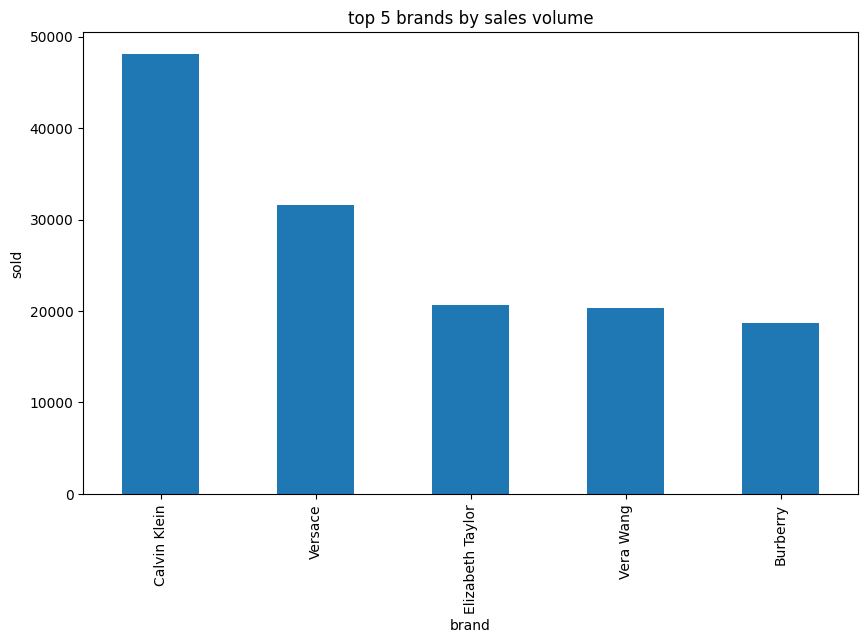

In [24]:
 import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
top_brands.plot(kind="bar")
plt.title('top 5 brands by sales volume')
plt.xlabel('brand')
plt.ylabel('sold')
plt.show()

***how does change price influnce the buyer purchasing power***

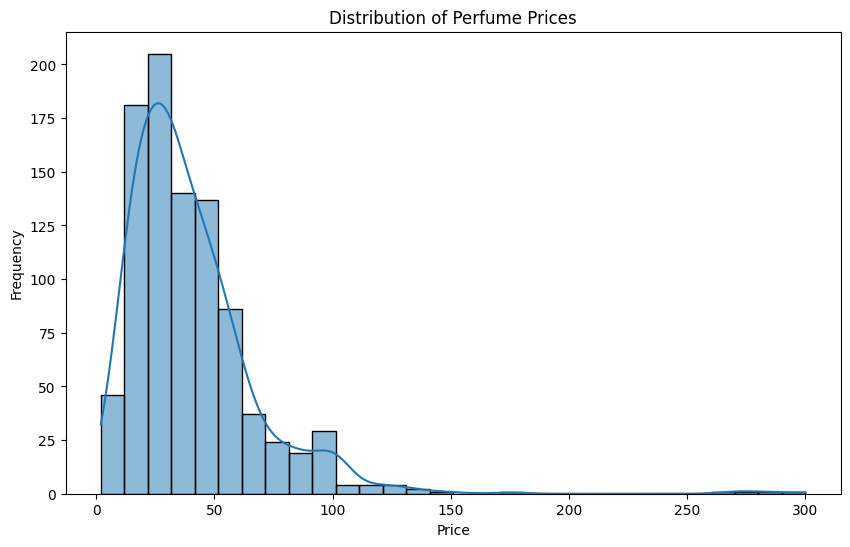

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(perfumes['price'], bins=30, kde=True)
plt.title('Distribution of Perfume Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**Determining which products require immediate restocking and identifying those with sufficient inventory levels.**

In [33]:
perfumes["sell_through_rate"] = perfumes['sold'] / (perfumes["sold"] + perfumes['available'])
perfumes

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation,sell_through rate,sell_through_rate
0,Carolina Herrera,Good Girl by Carolina Herrera 2.7 oz Eau De Pa...,Eau de Parfum,43.99,US $43.99/ea,2.0,2 available / 393 sold,393.0,"May 23, 2024 10:43:50 PDT","Thomasville, Alabama, United States",0.994937,0.994937
1,As Shown,Parfums de Marly Delina La Rosee Eau de Parfum...,Eau de Parfum,79.99,US $79.99,5.0,5 available / 40 sold,40.0,"May 24, 2024 00:15:48 PDT","New Jersey, Hong Kong",0.888889,0.888889
2,PRADA,PRADA Paradoxe by Prada EDP 3.0oz/90ml Spray P...,Eau de Parfum,59.99,US $59.99,10.0,More than 10 available / 35 sold,35.0,"May 14, 2024 20:54:25 PDT","Orange, New Jersey, United States",0.777778,0.777778
3,As Show,J'adore Parfum D'eau by Christian 3.4 oz EDP F...,Eau de Parfum,59.99,US $59.99/ea,10.0,More than 10 available / 9 sold,9.0,"May 23, 2024 01:23:05 PDT","USA, New Jersey, Hong Kong",0.473684,0.473684
5,Viktor & Rolf,Flowerbomb by Viktor & Rolf 3.4 oz 100ML Eau D...,Eau de Parfum,51.99,US $51.99/ea,8.0,8 available / 184 sold,184.0,"May 23, 2024 10:44:09 PDT","Warren, Michigan, United States",0.958333,0.958333
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Avon,Avon Far Away Infinity Eau de Parfum 1.7 fl. o...,Eau de Parfum,13.89,US $13.89,10.0,More than 10 available / 157 sold,157.0,"May 16, 2024 22:35:29 PDT","West Palm Beach, Florida, United States",0.940120,0.940120
996,Mancera,Roses Greedy by Mancera perfume for unisex EDP...,Eau de Parfum,57.85,US $57.85/ea,33.0,33 available / 58 sold,58.0,"May 24, 2024 08:03:11 PDT","Dallas, Texas, United States",0.637363,0.637363
997,Unbranded,"Sweet Tooth Eau de Parfum, Perfume for Women, ...",1,30.96,US $30.96,2.0,2 available / 3 sold,3.0,"May 17, 2024 23:16:41 PDT","New York, New York, United States",0.600000,0.600000
998,Juliette Has A Gun,MMMM BY Juliette Has A Gun perfume for her EDP...,Eau de Perfume,53.99,US $53.99/ea,3.0,3 available / 117 sold,117.0,"May 13, 2024 22:19:34 PDT","Dallas, Texas, United States",0.975000,0.975000


**Identifying Optimal Regions to Target Sellers and Buyers**

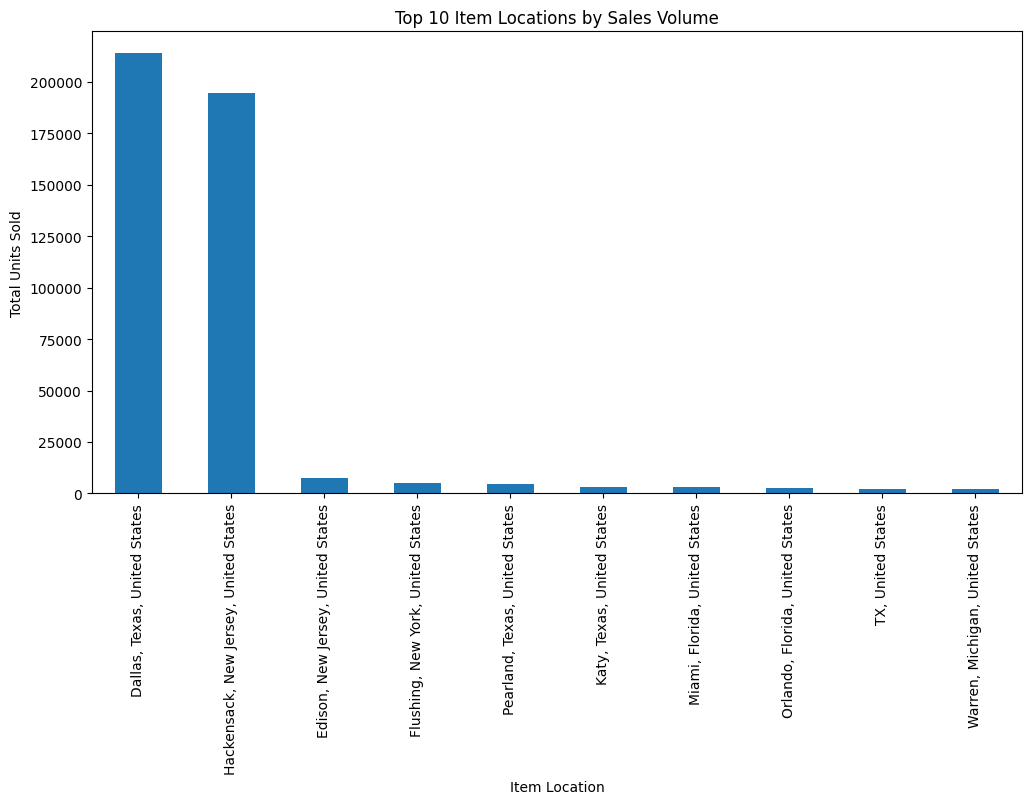

In [36]:
location_sales = perfumes.groupby('itemLocation')['sold'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
location_sales.plot(kind='bar')
plt.title('Top 10 Item Locations by Sales Volume')
plt.xlabel('Item Location')
plt.ylabel('Total Units Sold')
plt.show()

# **keytakewaway**

# **Sellers should maintain strong stock in budget perfumes to capture high-volume buyers, while also investing in premium listings since they generate disproportionately high revenue despite lower sales numbers.**
